# 动态规划0-1背包问题

问题描述:      
一个容量为4的背包，现有3个物品，物品1的重量为1，价值为15，物品二的重量为3，价值为20，物品三的重量为4，价值为30；  
求解在不超限的情况下，应该如何装载，得到的最大价值是多少？


题解：

动态规划五部曲

1.明确dp数组的含义：dp[i][j]表示，背包容量为j时，从0-i物品中随机选取（个数不限）

2.递推公式：dp[i][j]可以由dp[i-1][j]推出，即当第i个物体的重量大于当前背包容量时，不选取物品i,背包容量不变，那么可知dp[i][j] = dp[i-1][j]
  另一种情况与前述相反，可以选取物品i，则当前容量为j-[weight[i]],当前的价值为dp[i-1][j-weight[i]] + value[i],我们可以得到如下的递推公式：
  dp[i][j] = max(dp[i-1][j],dp[i-1][j-weight[i]] + value[i])

3.边界值初始化：边界值就是不经过迭代计算可以轻松得到的dp[i][j]值，通常考虑dp[i][0]，dp[0][j]等等，当j=0时，dp[i][0] = 0,因为容量为0时，
  无法放入物体，对于dp[0][j]，当weight[0]<=容量j时，dp[0][j] = value[0],相反地，当weight[0] > 容量j,dp[0][j] = 0

4.遍历关系：dp是关于i,j变化的数组，则应该是两层循环嵌套

5.实际推导验证，算出几个实例与输出结果进行对比


In [61]:
values = [15,20,30]
weights = [1,3,4]
limit = 4
def bag_0_1_problem(limit,values,weights):
    m = limit + 1 #dp数组的维度1
    n = len(weights) #dp数组的维度2
    dp = [[0 for _ in range(m)] for _  in range(n)]
    #初始化
    for j in range(m):
        if weights[0] <= j:
            dp[0][j] = values[0]
        else:
            dp[0][j] = 0
        
    for i in range(n):
        dp[i][0] = 0
    #两层遍历
    for i in range(1,n):
        for j in range(1,m):
            #在这里需要更进一步理解dp[i][j]的递推关系式，即当容量小于当前物品重量时
            #最大价值与不放入物品[i]时一致
            if j - weights[i] < 0:
                dp[i][j] = dp[i-1][j]
            else:
            #当容量可以放进物品[i]时，举例说明，当j=4时，可以放入物品3(其重量为4)
            #此时价值为30,但最大价值是可以不放入i的,因为只放入物品1和物品2时价值最大为35
                dp[i][j] = max(dp[i-1][j], dp[i-1][j-weights[i]]+values[i])
    return max(max(dp))
max_value = bag_0_1_problem(limit,values,weights)
print(max_value)

35


以上二维dp[i][j],可以简化称为一维dp[j],其是一个随另一维度不断整体变化的数组(滚动数组)  
递归五部曲:  
1.确定dp数组的含义:dp[j]表示背包容量为j时拥有的价值 
    
2.递推公式:dp[j] = max(dp[j-value[i]]+value[i],dp[j])  
    
3.初始化:当背包容量为0时，dp[j]=0,当背包的价值均大于零时，保证每次取当前的最大值，其余  
    下标初始化为0，当价值存在负数时，确保可以选到当前最大值，其余下标应初始化为负无穷 
    
4.遍历顺序确定：结论是先遍历物品，再遍历容量，且容量需要从大到小的遍历方式，并且不可以先
     遍历容量再遍历物品（结合代码详细解释）

In [62]:
values = [15,20,30]
weights = [1,3,4]
limit = 4
def bag_0_1_problem_1Ddp(limit,values,weights):
    m = limit + 1  #容量for区间
    n = len(weights)  #物品维度    
    dp = [0 for _ in range(m)]  #定义dp数组
    dp[0] = 0  #初始化
    if max(values) >= 0:
        dp[1:] = [0] * (limit)
    else:
        dp[1:] = [-float(inf)] * (limit)
    #两层遍历
    #对于遍历的顺序，以及遍历索引值的确定需要详细进行讨论
    #1 先遍历物品，再遍历容量，容量需要倒序进行输出
    # 如果不是倒序,那么有的物品会被多次选择，举例说明
    '''for i in range(n):
        for j in range(weights[i],limit+1):
            dp[j] = max(dp[j], dp[j-weights[i]]+values[i]) '''
   
    '''当选取的物品i=0时，dp[1] = max(dp[1],dp[0]+valuse[0]) = 15
     dp[2] = max(dp[2],dp[1]+valuse[0]) = 30，当背包容量为2时，背包只可以装物品1，
    价值为15,正序遍历的情况下，dp[1]覆盖了原dp[1] = 0,相当于选取了两次物品1
    因此需要进行逆序遍历'''
    
    '''再者，遍历的上下界为(weights[i],limit),惯性思维应该是从0开始一直到limit结束，
    但实际上对于j<weights[i]的情形，是无法再放入任何物品的，因此价值dp也无须进行更新'''
    
    '''最后，为什么不是先遍历容量，再遍历物品呢'''
    '''for j in range(limit,0,-1):
        for i in range(n):
            dp[j] = max(dp[j], dp[j-weights[i]]+values[i]) '''
    '''对于这种情况我们可以进行模拟，当外层循环定位limit=4时，dp[4]在内循环内
    会迭代改变三次,即dp[4] = max(dp[4],dp[3]+values[0]) = 15
                    dp[4] = max(dp[4],dp[1]+valuse[1]) = 20
                    dp[4] = max(dp[4],dp[0]+values[2]) = 30
    因此，在这种情形下最终结果dp[j]内只选取了一件物品'''
    
    
    #综上分析，最后确定我们的遍历顺序为先遍历物品，再遍历容量，容量倒序遍历，且索引边界
    #为weights[i]
    
    
    for i in range(n): #先遍历物品
        for j in range(limit,weights[i]-1,-1): #再遍历容量
            dp[j] = max(dp[j], dp[j-weights[i]]+values[i])
    return max(dp)
max_value = bag_0_1_problem_1Ddp(limit,values,weights)
print(max_value)

35


### 排序算法总结
 - 非线性时间比较类排序：冒泡、选择、插入、堆、快速、希尔、归并
    * * *
 - 线性时间比较类排序：基数、桶和计数排序
    * * *
 - 稳定与否：待排序数组中两个相等的值，排序前后的相对位置不发生改变
    * * *
 - 排序算法的时间复杂度及稳定性如下表
    * * *
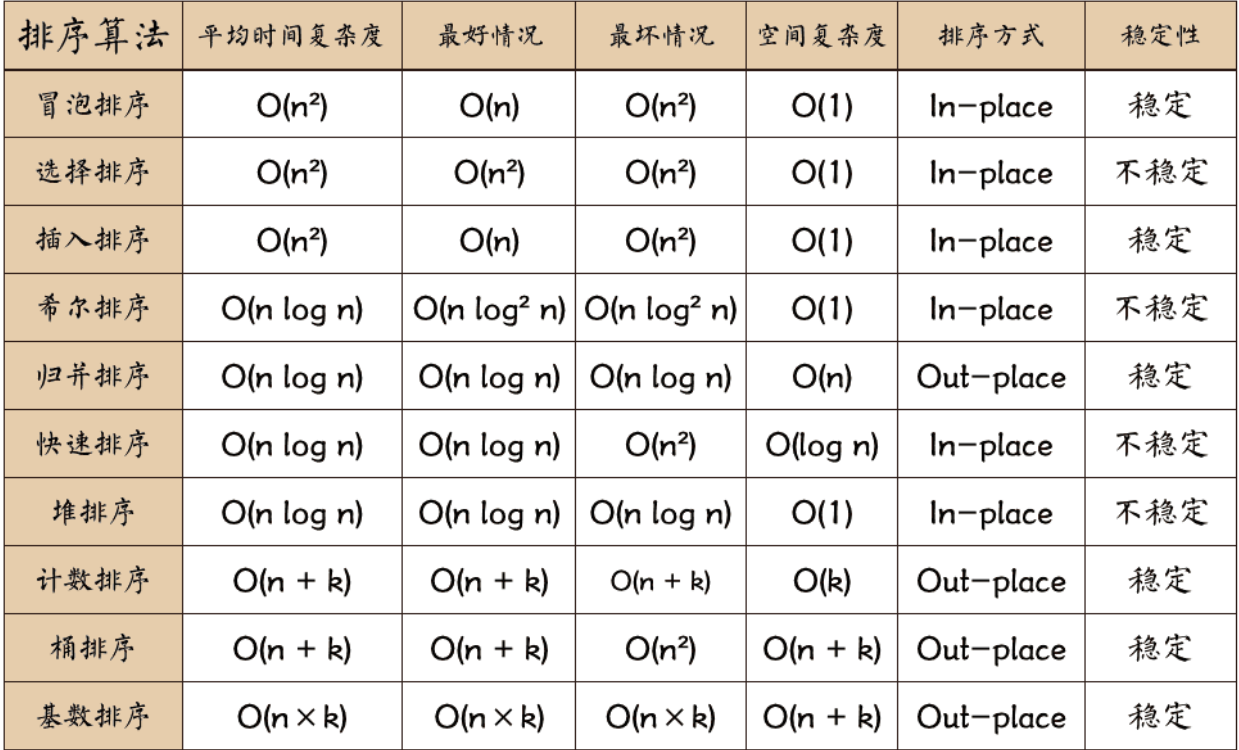

 ### 冒泡排序时间复杂度分析
  - 最坏时间复杂度，外层循环数为n-1,内层循环是递减的,从n-1开始，一直递减到1  
     因此总的操作数为 1 + 2 + 3....+ (n-1),共n-1个数，使用等差数列前n项和公式  
     计算得结果为(n-1) / 2 * (1+n-1) = (n**2 - n ) / 2,因此最坏、平均时间复杂度为O（n2）
     - - -
  - 最好时间复杂度，相关资料都是O（n）,但实际上是有前提的，如果不更改上述代码，  
    该进行的操作一次也不会少，可以通过下方的测试代码看出，并没有发生变化
     - - -
  - 如果要最好时间复杂度降低为O(n),需要在第一轮冒泡操作后判断其是否与原数组相同  
      如若相同，跳出循环
     - - - 
  - 空间复杂度O(1)，在原数组上进行更改交换，稳定


In [13]:
def bubble_sort(nums):
    for i in range(len(nums)-1): # n个元素共需要进行n-1轮排序
        for j in range(len(nums)-1-i): # 没经过一轮排序都将有一个元素被定位，下一轮比较交换次数减1
            if nums[j] > nums[j+1]:
                nums[j], nums[j+1] = nums[j+1], nums[j]
    return nums
print(f'排序后的数组为：{bubble_sort([5,0,9,4,6,1,3,7,2,8])}')

排序后的数组为：[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [15]:
'''冒泡排序
最好时间复杂度程序改动'''
def bubble_sort(arr):
    count = 0
    nums = arr[:]
    for i in range(len(nums)-1): # 包含n个元素的数组，至多需要n-1轮排序
        for j in range(len(nums)-i-1): # 每经过一轮排序，就有一个元素锁定了其位置
        # 下一次冒泡操作需要进行的比较次数就减1，这里与外层循环联系起来
        # 为了确保j+1索引不过限，j的最大取值是len(nums)-2
        # 综上所述，j的循环取值范围为0，len(nums)-1-i
            count += 1
            if nums[j] > nums[j+1]:
                nums[j], nums[j+1] = nums[j+1],nums[j]
        if arr == nums:
            break
    print('所需要的操作数:{}'.format(count))
    return nums
print(f'排序后的数组为：{bubble_sort([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])}')

所需要的操作数:9
排序后的数组为：[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


 ### 选择排序时间复杂度分析
  - 选择排序的思想就是，每次从未排序数组中选择最小的元素，插入到已排序数组的后面
      (也即与未排序数组的首位置进行交换)
     - - -
  
  - 为了确保未排序数组还有值，i最大取值到n-2,即外层循环共n次操作
     - - - 
  - 内部循环随着待排序数组的增加，每次操作的数量递减
      - - - 
  - 同冒泡排序法可以得知，最坏、平均时间复杂度为O（n2）
      - - - 
  - 选择排序的最好时间复杂度依然为O（n2）,无论如何都要在未排序数组中查找最小值
     - - - 
  - 空间复杂度O(1)，在原数组上进行交换更改，不稳定，如[5,5,3]会将第一个5排在第二个5身后


In [21]:
def select_sort(nums):
    for i in range(len(nums)-1):
        min_idx = i
        for j in range(i+1, len(nums)):
            if nums[j] < nums[min_idx]:
                min_idx = j
        nums[i], nums[min_idx] = nums[min_idx], nums[i]
    return nums
nums = [5,4,7,9,1,3,2,0,6,8]
sorted_nums = select_sort(nums)
print(f'The sorted nums:{sorted_nums}')

The sorted nums:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### 插入排序时间复杂度分析
  - 插入排序思想可以类比打扑克
   - - - 
  - 遍历未排序数组，将其与已排序数组的每个元素从后往前比较，直到前一元素比当前元素小
      - - - 
  - 要注意while与自减运算的结合使用
      - - - 
  - 外层循环n-1次，内存循环分别为1,2...n-1，因此最坏时间复杂度为O（n2）
       - - - 
  - 最好的情况下，每次外层循环，只会判断一次cur和nums[prev]的值，while
    循环内的操作将不在进行，因此最好时间复杂度O(n)
    - - - 
  - 空间复杂度为O(1),inpalce,稳定
  

In [23]:
def insert_sort(nums):
    for i in range(1, len(nums)):
        pre_idx = i - 1
        cur = nums[i]
        while pre_idx >= 0 and cur < nums[pre_idx]:
            nums[pre_idx+1] = nums[pre_idx]
            pre_idx -= 1
        nums[pre_idx+1] = cur # 以第1轮为例，跳出while循环时pre_idx = -1， 因此这里的索引应该是pre_idx+1
    return nums
nums = [5,4,7,9,1,3,2,0,6,8]
sorted_nums = select_sort(nums)
print(f'The sorted nums:{sorted_nums}')

The sorted nums:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### 希尔排序时间复杂度分析
  - 其原理是将nums按照递减步长分组，在组内进行插入排序
  - 希尔排序时间复杂度该怎么计算呢 ？？？？？
  - 当gap //= 2的时候的计算方法
  - 平均O(nlogn),最好和最坏均为O(n(logn)^2)
  - 空间复杂度O(1),不稳定，一般只要设计到不相邻的两个值之间的交换，就是不稳定的
  

In [12]:
def shell_sort(nums):
    gap = len(nums) // 2
    while gap > 0:
        for i in range(gap, len(nums)):
            j = i
            while j - gap >= 0 and nums[j] < nums[j-gap]: # j-gap索引需要记住，总之要保证交换索引不出现负值
                nums[j], nums[j-gap] = nums[j-gap], nums[j]
                j -= gap # 查找组内下一个元素
        gap //= 2  
    return nums
nums =[8,9,1,7,2,3,5,4,6,0]
shell_sort(nums)
print(nums)   

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### 归并排序原理及时间复杂度
1. 假设有两个已经有序的列表，设定两个指针分别指向这两个列表的起始元素，申请内存空间新建一个空列表，比较两个指针指向的元素大小，将较小的元素添加到新列表中，然后将该指针向该列表的下一个元素偏移，继续比较两个指针指向的元素和添加较小的到新列表中。直到其中一个列表的数据全部被添加完时，把另一个列表中剩下的数据按顺序添加到新列表中。这就实现了将两个有序列表合并成一个新的有序列表的方法。
 - - - 

2. 对待排序列表进行拆分，递归地拆分直到子列表中只有一个元素。
 - - -
3. 只有一个元素的子列表一定是有序的，使用1中的方法对有序的子列表进行合并。第一次合并后新列表是有两个元素的有序列表，递归地往回合并，直到所有数据都合并到一个新的有序列表中，列表排序完成。
 - - - 
时间复杂度分析：将n个元素，二分至叶子节点处只包含一个元素，需要logn次操作，在每一层上对
其进行合并操作，均为n次操作，因此最坏，平均，最好时间复杂度均为O(nlogn)
 - - - 
空间复杂度：每次都需要O(n)的空间进行合并，在栈内辗转了logn次，空间复杂度为O(n),这里存在疑问？,一个解释是说，本层递归完成以后会将O(n)空间释放，所以任意时刻都只需要O(n)的额外空间
- - - 

4. 稳定：两个数相同，只要在合并过程中式中维护原来的相互位置关系即可，即```if left <= right:res.append(left)```


In [15]:
def merge_sort(nums):
    if len(nums) < 2:
        return nums
    left = 0
    right = len(nums) ## 这个地方的取值需要考究，后续的处理过程中设计到右侧边界的都是数组，如果right = len(nums)-1，再根据列表有边界的性质
    # 结果只能取到len(nums) - 2，会少一个值，因此此处的索引为len(nums)
    mid = (right - left) // 2 + left
    left_part = merge_sort(nums[:mid])
    right_part = merge_sort(nums[mid:])
    
    def merge(left_part, right_part):
        res = [ ]
        while left_part and right_part:
            if left_part[0] <= right_part[0]:
                res.append(left_part.pop(0))
            else:
                res.append(right_part.pop(0))
        if left_part:
            res.extend(left_part)
        else:
            res.extend(right_part)
        return res
    return merge(left_part, right_part)

nums =[8,9,1,7,2,3,5,4,6,0]
res = merge_sort(nums)
print(f'排序后的数组为:{res}')  

排序后的数组为:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### 快速排序原理及复杂度分析

1. 从待排序列表中选取一个基准数据(通常选取第一个数据)
  - - - 

2. 将待排序列表中所有比基准数据小的元素都放到基准数据左边，所有比基准数据大的元素都放到基准数据右边(升序排列，降序反之)。  
    用基准数据进行分割操作后，基准数据的位置就是它最终排序完成的位置，第一轮排序完成。
 - - - 
   具体地对第二部进行阐述，选定基准数后，每一轮内完成，从右侧选取第一个比基准小的值，与左索引值交换，然后从左侧寻找第一个比  
   基准值大的值，与右侧索引值交换，如果左右索引相等，该位置就是基准值所在的位置
    - - -
3. 递归地对左右两个部分的数据进行快速排序。即在每个子列表中，选取基准，分割数据。直到被分割的数据只有一个或零个时，列表排序完成。
   - - - 
4. 时间复杂度，最差为O(n^2), 最好和平均为O(nlogn)， 空间复杂度为递归的深度O(logn)，只要设计到二分类的递归，都包含一个压栈的复杂度为O(logn)
  - - - 
5. 不稳定，只要设计到垮步长交换值，就是不稳定，以10,5,5为例，变化为5,5,5 - 5,5,10相对位置已经发生变化

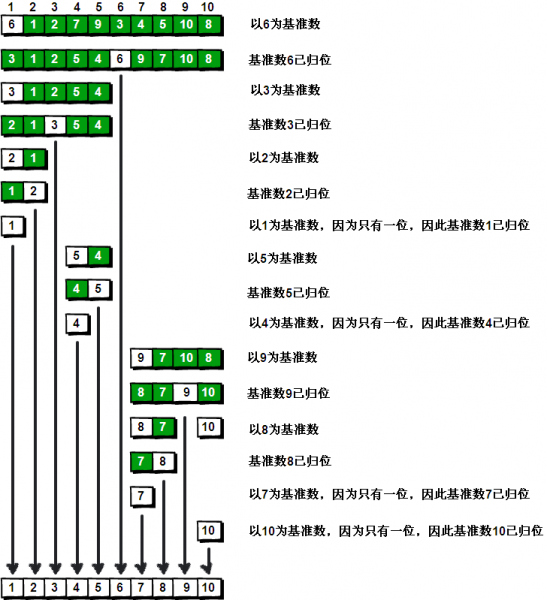

In [29]:
#### 快速排序速写
def quick_sort(nums, start, end):
    if start >= end:
        return
    
    value, left, right = nums[start], start, end
    
    while left < right:
        while left < right and nums[right] > value:
            right -= 1
        nums[left] = nums[right]
        
        
        while left < right and nums[left] < value:
            left += 1
        nums[right] = nums[left]
        
    nums[left] = value
    
    
    quick_sort(nums, 0, left-1)
    quick_sort(nums, left+1,end)

    
nums = [54,26,93,17,77,31,44,55,20]
quick_sort(nums,0,len(nums)-1)
print(nums)   
            
    
    

[17, 20, 26, 31, 44, 54, 55, 77, 93]


In [17]:
#### 快速排序

#### 最差时间复杂度O（n^2），平均时间复杂度O（nlogn）,不稳定
### 以10,5,5为例，变化为5,5,5 - 5,5,10相对位置已经发生变化
### 空间复杂度为O（logn） 跟压栈次数相关
def quick_sort(nums, start, end):
    
    
    if start >= end:
        return
    
    value = nums[start]
    
    i = start
    j = end
    
    while i < j:
    
        while i < j and nums[j] > value: # 从右侧去寻找第一个比
            j -= 1
        nums[i] = nums[j]
        print(f'右侧扫描结果：{nums}')

        while i < j and nums[i] < value:
            i += 1
        nums[j] = nums[i]
        print(f'左侧扫描结果：{nums}')
    nums[i] = value
    print(f'轮次结束结果：{nums}')
    
    
    quick_sort(nums, start, i-1)
    quick_sort(nums, i+1, end)
    
nums = [54,26,93,17,77,31,44,55,20]
quick_sort(nums,0,len(nums)-1)
print(nums)   
    
     

右侧扫描结果：[20, 26, 93, 17, 77, 31, 44, 55, 20]
左侧扫描结果：[20, 26, 93, 17, 77, 31, 44, 55, 93]
右侧扫描结果：[20, 26, 44, 17, 77, 31, 44, 55, 93]
左侧扫描结果：[20, 26, 44, 17, 77, 31, 77, 55, 93]
右侧扫描结果：[20, 26, 44, 17, 31, 31, 77, 55, 93]
左侧扫描结果：[20, 26, 44, 17, 31, 31, 77, 55, 93]
轮次结束结果：[20, 26, 44, 17, 31, 54, 77, 55, 93]
右侧扫描结果：[17, 26, 44, 17, 31, 54, 77, 55, 93]
左侧扫描结果：[17, 26, 44, 26, 31, 54, 77, 55, 93]
右侧扫描结果：[17, 26, 44, 26, 31, 54, 77, 55, 93]
左侧扫描结果：[17, 26, 44, 26, 31, 54, 77, 55, 93]
轮次结束结果：[17, 20, 44, 26, 31, 54, 77, 55, 93]
右侧扫描结果：[17, 20, 31, 26, 31, 54, 77, 55, 93]
左侧扫描结果：[17, 20, 31, 26, 31, 54, 77, 55, 93]
轮次结束结果：[17, 20, 31, 26, 44, 54, 77, 55, 93]
右侧扫描结果：[17, 20, 26, 26, 44, 54, 77, 55, 93]
左侧扫描结果：[17, 20, 26, 26, 44, 54, 77, 55, 93]
轮次结束结果：[17, 20, 26, 31, 44, 54, 77, 55, 93]
右侧扫描结果：[17, 20, 26, 31, 44, 54, 55, 55, 93]
左侧扫描结果：[17, 20, 26, 31, 44, 54, 55, 55, 93]
轮次结束结果：[17, 20, 26, 31, 44, 54, 55, 77, 93]
[17, 20, 26, 31, 44, 54, 55, 77, 93]


In [3]:
def quick(nums, start, end):
    if start >= end:
        return
    value = nums[start] ##设定目标元素  
    low = start
    high = end
    while low < high:
        while low < high and nums[high] >= value:
            high -= 1 # 循
        nums[low] = nums[high]
        
        while low < high and nums[low] <= value:
            low += 1
        nums[high] = nums[low]
    nums[low] = value
    
    quick(nums,start,low-1)
    quick(nums,low+1,len(nums)-1)
    
    
    
nums = [54,26,93,17,77,31,44,55,20]
quick(nums,0,len(nums)-1)
print(nums)
    
    
    
    

[17, 20, 26, 31, 44, 54, 55, 77, 93]


In [12]:
def quick_sort(nums, start, end):
    if start >= end:
        return
    i = start
    j = end
    value = nums[start]
    while i < j:
        while i < j and nums[j] >= value:
            j -= 1
        nums[i] = nums[j]
        
        while i < j and nums[i] <= value:
            i += 1
            
        nums[j] = nums[i]
        
    nums[i] = value
    
    quick_sort(nums, start, i-1) ### 不是索引，而是函数的参数
    quick_sort(nums, i+1, end)
nums = [54,26,93,17,77,31,44,55,20]
quick_sort(nums,0,len(nums)-1)
print(nums)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


In [2]:
'''快速排序
时间复杂度后续分析'''

def quick_sort(nums, start, end):

    # 递归的退出条件
    if start >= end:
        return

    # 设定起始元素为要寻找位置的基准元素
    value = nums[start]

    # low为序列左边的由左向右移动的游标
    low = start

    # high为序列右边的由右向左移动的游标
    high = end

    while low < high:
        # 如果low与high未重合，high指向的元素不比基准元素小，则high向左移动
        while low < high and nums[high] >= value:
            high -= 1
        # 将high指向的元素放到low的位置上
        nums[low] = nums[high]
        print(nums)

        # 如果low与high未重合，low指向的元素比基准元素小，则low向右移动
        while low < high and nums[low] <= value:
            low += 1
        # 将low指向的元素放到high的位置上
        nums[high] = nums[low]
        print(nums)

    # 退出循环后，low与high重合，此时所指位置为基准元素的正确位置
    # 将基准元素放到该位置
    nums[low] = value
    print(low)

    # 对基准元素左边的子序列进行快速排序
    quick_sort(nums, start, low-1)

    # 对基准元素右边的子序列进行快速排序
    quick_sort(nums, low+1, end)


nums = [54,26,93,17,77,31,44,55,20]
quick_sort(nums,0,len(nums)-1)
print(nums)
    

[20, 26, 93, 17, 77, 31, 44, 55, 20]
[20, 26, 93, 17, 77, 31, 44, 55, 93]
[20, 26, 44, 17, 77, 31, 44, 55, 93]
[20, 26, 44, 17, 77, 31, 77, 55, 93]
[20, 26, 44, 17, 31, 31, 77, 55, 93]
[20, 26, 44, 17, 31, 31, 77, 55, 93]
5
[17, 26, 44, 17, 31, 54, 77, 55, 93]
[17, 26, 44, 26, 31, 54, 77, 55, 93]
[17, 26, 44, 26, 31, 54, 77, 55, 93]
[17, 26, 44, 26, 31, 54, 77, 55, 93]
1
[17, 20, 31, 26, 31, 54, 77, 55, 93]
[17, 20, 31, 26, 31, 54, 77, 55, 93]
4
[17, 20, 26, 26, 44, 54, 77, 55, 93]
[17, 20, 26, 26, 44, 54, 77, 55, 93]
3
[17, 20, 26, 31, 44, 54, 55, 55, 93]
[17, 20, 26, 31, 44, 54, 55, 55, 93]
7
[17, 20, 26, 31, 44, 54, 55, 77, 93]


#### 堆排序原理及复杂度
   - 堆：每个节点的值都大于/小于等于左右孩子节点的值，为大顶堆/小顶堆
    - - -
   - 数组与二叉树结构的相互转换
   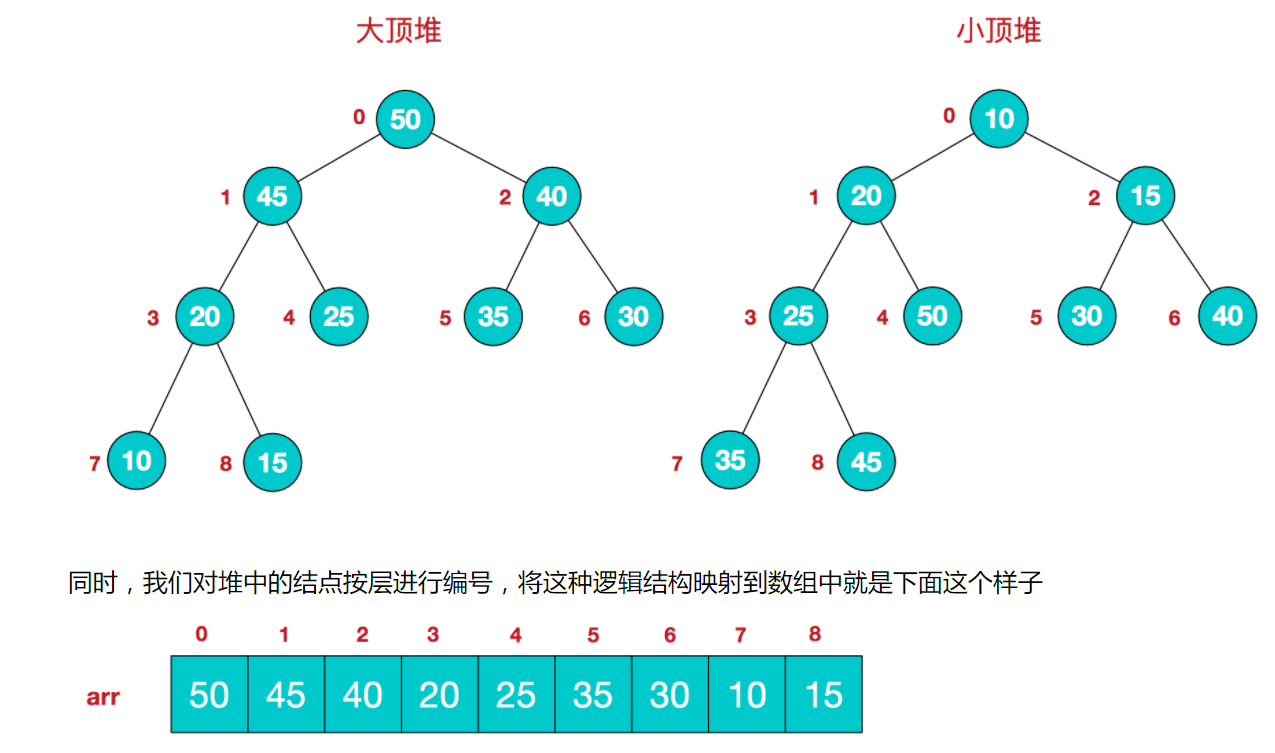
   - 对于数组中的节点i,其左子节点为2\*i+1，右子节点为2\*i+2
    因此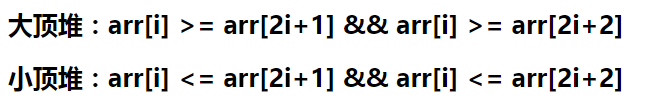
    - - -
   - 堆排序算法的思想就是，每一轮形成一个大顶堆，然后将堆顶元素与末位元素进行交换  
       每一步筛选出的堆顶元素就是最大值，以此填充到n,n-1,...的位置上, 写一次形成大顶堆不包含此元素
    - - - 
   - 复杂度：每一轮排序将会从堆中取出一个值，共需要进行n轮取值操作，在每一轮堆化操作中实际需要进行的交换操作  
     平均为logn次，所以堆排序的最好，最坏，平均时间复杂度均为O(nlogn)
     - - -
   - 稳定性：在堆化过程中，设计到非相邻元素的交换，因此为不稳定的

In [44]:
def heapify(nums, n, i): # 相乘局部大顶堆，只能确保以叶子节点和叶子节点的根节点的局部二叉树为大顶堆
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2
    if left < n and nums[left] > nums[largest]:
        largest = left
        
    if right < n and nums[right] > nums[largest]:
        largest = right
        
    if i != largest:
        nums[i], nums[largest] = nums[largest], nums[i]
        heapify(nums, n, largest)

def heap_sort(nums):
    n = len(nums)
    for i in range(n//2-1, -1, -1): # 初始大顶堆的生成，懂右侧第一个非叶子节点-左，再向上查找的方式
        heapify(nums, n, i)
        
    for i in range(n-1, 0, -1):
        nums[i], nums[0] = nums[0], nums[i]
        heapify(nums, i, 0)
        
arr = [54,26,93,17,77,31,44,55,20]
heap_sort(arr)
print(f'排序后的列表为：{arr}')  

排序后的列表为：[17, 20, 26, 31, 44, 54, 55, 77, 93]


In [22]:

def count(nums):
    Max = max(nums)
    
    count = [0] * (Max+1)
    for i in nums:
        count[i] += 1
    res = []
    
    idx = 0
    
    for i in count:
        while count[i]:
            res.append(i)
            idx += 1
            count[i] -= 1
    return nums
print(countSort([17, 20, 26, 31, 44, 54, 55, 77, 93]))

[17, 20, 26, 31, 44, 54, 55, 77, 93]


### 计数排序原理及复杂度分析
1. 找到待排序列表中的最大值 k，开辟一个长度为 k+1 的计数列表，计数列表中的值都为 0
  - - - 
2. 走访待排序列表，如果走访到的元素值为 i，则计数列表中索引 i 的值加1
    - - -
3. 走访完整个待排序列表，计数列表中索引 i 的值 j 表示 i 的个数为 j，统计出待排序列表中每个值的数量
   - - - 
4. 创建一个新列表，遍历计数列表，依次在新列表中添加 j 个 i，新列表就是排好序后的列表，整个过程没有比较待排序列表中的数据大小
 - - -

    时间复杂度:O(n+k),O(n+k),O(n+k), 空间复杂度O(n+k),重新开辟了n大小的数组装结果，以及k大小的count用来计数.
    稳定算法：稳定，记住不涉及到非响铃元素的交换即为稳定

In [66]:
# 计数排序
def count_sort(nums):
    Max = max(nums)
    count = [0] * (Max+1)
    for i in nums:
        count[i] += 1
    res = [ ]
    for i in range(len(count)):
        while count[i]:
            res.append(i)
            count[i] -= 1
    return res
print(count_sort([8,9,1,7,2,3,5,4,6,0]))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [67]:
def count_sort(nums):
    Max = max(nums)
    Min = min(nums)
    count = (Max - Min + 1) * [0]
    for i in nums:
        count[i - Min] += 1
    res = [ ]
    for i in range(len(count)):
        while count[i]: # 使用while循环将相等的值全部取出来
            res.append(i+Min)
            count[i] -= 1
    return res
print(count_sort([8,9,1,7,2,3,5,4,6,0]))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### 基数排序原理及复杂度分析
基数排序的原理如下：

1. 求出待排序列表中的最大值，并求出最大值的位数，有多少位就需要进行多少轮分桶和合并;
  * * *

2. 开辟内存空间，创建用于分配数据的桶。整数排序时，每一位的范围都在0~9之间，所以需要创建10个桶;
   * * *
3. 从数据的个位开始(从最高位开始也可以，结果一样)，按个位数对数据进行分桶，不考虑其它位的数据大小;
   * * * 
4. 待排序列表中的所有数据都分桶完成后，将所有桶中的数据进行合并，合并时按先进先出的原则取出桶中的数据;
    * * *
5. 重复步骤3,4，继续按其他位对前面处理过的数据进行分桶和合并。一直到对每一位数据都进行分桶和合并完成，最终得到一个有序序列，列表排序完成;
 * * * 
- 复杂度分析：
   外部循环次数为 K = 最大数有多少位， 内部循环包括 往桶里放数 操作数为n
   从桶里取数，总操作数为n，因此总的操作数为2\*k\*n, 为O(k\*n),无论是否已经
   排序好，都要经过上述所有操作，即最好，最坏，平均时间复杂度都为O(k\*n)
   空间复杂度 需要重新开辟一个RES，以及K个桶，因此空间复杂度为O(n+k)
   - - - 
    排序方式:out_place, 因为同样大小的数组，进入的是相同的桶，也是按照先进先出的原则，
    那么其先后顺序不会改变，因此是稳定的

In [31]:
def radix_sort(nums):
    n = len(str(max(nums)))
    for k in range(n):
        bucks = [[ ] for _ in range(10)]
        
        for num in nums:
            bucks[num // 10 ** k % 10].append(num)
        nums = [ ]
        for buck in bucks:
            for num in buck:
                nums.append(num)
    return nums
print(radix_sort([17, 20, 26, 31, 44, 54, 55, 77, 93]))

[17, 20, 26, 31, 44, 54, 55, 77, 93]


In [30]:
def radix_sort(nums):
    Max = max(nums)
    n = len(str(Max))
    

    
    for i in range(n):
        buck = [[ ] for _ in range(10)] # 注意每一轮都要建立全新的桶来进行分基数进行排序
        for num in nums:
            buck[num // 10 ** i % 10].append(num)
        nums = [ ]
        for i in buck:
            for j in i:
                nums.append(j)
    return nums
print(radix_sort([17, 20, 26, 31, 44, 54, 55, 77, 93]))

[17, 20, 26, 31, 44, 54, 55, 77, 93]


In [22]:
'''基数排序'''
# radix_sort 代码实现
def radix_sort(nums):
    n = len(str(max(nums)))  # 记录最大值的位数
    for k in range(n):# n轮排序
        # 每一轮生成10个列表
        bucket_list=[[] for i in range(10)] # 因为每一位数字都是0~9，故建立10个桶
        for i in nums:
            # 按第k位放入到桶中
            bucket_list[i//(10**k)%10].append(i) #求取数字的第n位是多少
        # 按当前桶的顺序重排列表
        nums = [j for i in bucket_list for j in i] #列表推导式嵌套
        
        # 上面的语句等价为：
        # for i in bucket_list:
        #   for j in i:
        #        [].append(j)
    return nums
print(radix_sort([17, 20, 26, 31, 44, 54, 55, 77, 93]))

[17, 20, 26, 31, 44, 54, 55, 77, 93]


In [12]:
def radix(nums):
    
    n = len(str(max(nums))) # 最大数字有多少位，就需要进行多少次的排序
    
    for k in range(n):
        
        ## 求取nums各元素，个位，十位...上的值
        bucket_list=[[] for i in range(10)] ## 因为每一位上的数字变化都是 0-9
        
        for i in nums:
            
            # 按第k位放入到桶中
            bucket_list[i//(10**k)%10].append(i)
        
        
        # 按照第一位排完后，取出，再按照第二位重复上述步骤
        nums = [ ]
        for i in bucket_list:
            for j in i:
                nums.append(j)
        
                
    return nums
            
print(radix([17, 20, 26, 31, 44, 54, 55, 77, 93]))    

[17, 20, 26, 31, 44, 54, 55, 77, 93]


In [21]:
#### 桶排序

# coding=utf-8
def bucket_sort(array):
    min_num, max_num = min(array), max(array)
    
    bucket_num = (max_num-min_num)// 3 + 1 # 桶的个数，桶里存储的是一定范围的值
    
    buckets = [[] for _ in range(int(bucket_num))] # 生成n个桶
    
    for num in array:
        buckets[int((num-min_num)//3)].append(num) # 找到属于那个桶
    
    new_array = list()
    for i in buckets:
        for j in sorted(i):
            new_array.append(j)
    return new_array
 
 
if __name__ == '__main__':
    array = [5, 7, 3, 7, 2, 3, 2, 5, 9, 5, 7, 8]
    print(bucket_sort(array))

[2, 2, 3, 3, 5, 5, 5, 7, 7, 7, 8, 9]


### 桶排序原理及时间复杂度分析
    桶排序的原理如下：
    1. 求出待排序列表中的最大值和最小值，得到数据的范围；

    2. 根据数据的范围，选择一个适合的值构建有限数量的桶，确定每个桶的数据范围。如数据范围是[0,100)，将数据分成10个桶，第一个桶为[0,10)，第二个桶为[10,20)，以此类推；

    3. 将待排序列表中的数据分配到对应的桶中；

    4. 对每一个桶内的数据进行排序，这里可以采用任意一种排序算法，建议采用时间复杂度小的排序算法；

    5. 将所有桶中的数据依次取出，添加到一个新的有序序列中，列表排序完成；
    
    
    桶排序时间复杂度：
     最好时间复杂度：O(n+k)放入k个桶以后，每个桶内的元素都是排序好的
     平均时间复杂度：O(n+k)
     最坏时间复杂度：O(n^2)
      
     空间复杂度为O(n+k)，重新开辟了Res，为n大小，K个桶
    
    
    桶排序算法稳定性取决于桶内排序算法的稳定性
    单独开辟了一组内存存储排序后的数组，所以是out-place
    
    

In [19]:
'''桶排序
时间复杂度：'''
# bucket_sort 代码实现
def bucket_sort(nums):
    Max = max(nums)
    Min = min(nums)
    
    bucket_range = (Max - Min) / len(nums) #桶数组的大小
    count_list = [ [] for i in range(len(nums) + 1)] #每个桶是一个小型的计数排序count数组
    
    
    #向桶内填充数字
    for i in nums:
        count_list[int((i-Min)//bucket_range)].append(i)
    nums.clear()
    
    # 回填，这里桶内部排序直接调用了sorted
    for i in count_list:
        for j in sorted(i):
            nums.append(j)
nums = [17, 20, 26, 31, 44, 54, 55, 77, 93]
bucket_sort([17, 20, 26, 31, 44, 54, 55, 77, 93])
print(nums)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


In [35]:
def buck_sort(nums, brange):
    Max = max(nums)
    Min = min(nums)
    buck_quantity = (Max - Min) // brange + 1
    buck = [[ ] for _ in range(buck_quantity)]
    for i in nums:
        buck[int((i-Min)/brange)].append(i)
    nums.clear()
    for i in buck:
        for j in sorted(i):
            nums.append(j)
    return nums
array = [5, 7, 3, 7, 2, 3, 2, 5, 9, 5, 7, 8]
print(buck_sort(array,3))

[2, 2, 3, 3, 5, 5, 5, 7, 7, 7, 8, 9]


In [6]:
def buck_sort(nums, brange):
    Max = max(nums)
    Min = min(nums)
    buck_quantity = (Max - Min) // brange + 1
    buck = [[ ] for _ in range(buck_quantity)]
    
    for i in nums:
        buck[int((i-Min)/brange)].append(i)
    res = [ ]
    for i in buck:
        for j in sorted(i):
            res.append(j)
            
    return res
array = [5, 7, 3, 7, 2, 3, 2, 5, 9, 5, 7, 8]
print(buck_sort(array,3))

[2, 2, 3, 3, 5, 5, 5, 7, 7, 7, 8, 9]


In [3]:
def buck_sort(nums, brange):
    Max = max(nums)
    Min = min(nums)
    # 桶的数量应该怎么求, 类比于计数排序，桶的个数时MAX-MIN+1, 应为要确保索引的值能够到达max，所以产生的桶的数量应该是MAX+1
    buck_quantity = (Max - Min) // brange + 1
    
    buck = [[ ] for _ in range(buck_quantity)]
    
    for i in nums:
        buck[int(i-Min)//brange].append(i)
    nums.clear()
    for i in buck:
        for j in sorted(i):
            nums.append(j)
    return nums
array = [5, 7, 3, 7, 2, 3, 2, 5, 9, 5, 7, 8]
print(buck_sort(array,3))

[2, 2, 3, 3, 5, 5, 5, 7, 7, 7, 8, 9]


In [36]:
def buck(nums,brange):
    Max = max(nums)
    Min = min(nums)
    buck_quantity = (Max - Min) // brange + 1
    print(buck_quantity)
    
    # 生成桶
    buck = [[] for _ in range(buck_quantity)]
    
    # 分别对桶内的元素进行排序
    for i in nums:
        idx = int((i-Min)//brange)
        buck[idx].append(i)
        
    nums.clear()
    
    for i in buck:
        for j in sorted(i):
            nums.append(j)
            
    return nums

array = [5, 7, 3, 7, 2, 3, 2, 5, 9, 5, 7, 8]
print(buck(array,3))

3
[2, 2, 3, 3, 5, 5, 5, 7, 7, 7, 8, 9]


In [40]:
def buck(nums,brange):
    
    Max = max(nums)
    Min = min(nums)
  
    
    buck_quantity = (Max - Min) // brange + 1
    
    print(buck_quantity)
    
    buck = [[] for _ in range(buck_quantity)]
   
    for i in nums:
        
        buck[int(i-Min)//brange].append(i)
    
    nums.clear()
    for i in buck:
        for j in sorted(i):
            nums.append(j)
            
    return nums

array = [5, 7, 3, 7, 2, 3, 2, 5, 9, 5, 7, 8]
print(buck(array,3))

3
[2, 2, 3, 3, 5, 5, 5, 7, 7, 7, 8, 9]


In [17]:
def buck_sort(nums,brange): # brange是每个桶容纳的数量
    Max = max(nums)
    Min = min(nums)
    
    buck_quantity = (Max - Min) // brange + 1
    
    
    buck = [[ ] for _ in range(buck_quantity)]
    
    for i in nums:
        buck[int(i-Min)//brange].append(i)
        
    nums.clear()
    for i in buck:
        for j in sorted(i):
            nums.append(j)
            
    return nums

array = [5, 7, 3, 7, 2, 3, 2, 5, 9, 5, 7, 8]
print(buck(array,3))

NameError: name 'buck' is not defined

In [19]:
# O(n2) O(1) 稳定 inplace
def bubble_sort(nums):
    for i in range(len(nums)-1):
        for j in range(len(nums)-1-i):
            if nums[j] > nums[j+1]:
                nums[j], nums[j+1] = nums[j+1], nums[j]
                
    return nums
array = [5, 7, 3, 7, 2, 3, 2, 5, 9, 5, 7, 8]
print(bubble_sort(array))

[2, 2, 3, 3, 5, 5, 5, 7, 7, 7, 8, 9]


In [22]:
def select_sort(nums):
    for i in range(len(nums)-1):
        min_idx = i
        for j in range(i+1,len(nums)):
            if nums[j] < nums[min_idx]:
                min_idx = j
        nums[i], nums[min_idx] = nums[min_idx], nums[i]
        
    return nums

array = [5, 7, 3, 7, 2, 3, 2, 5, 9, 5, 7, 8]
print(select_sort(array))

[2, 2, 3, 3, 5, 5, 5, 7, 7, 7, 8, 9]


In [26]:
def insert_sort(nums):
    for i in range(1,len(nums)):
        prev = i - 1
        cur = nums[i]
        while prev >= 0 and cur < nums[prev]:
            nums[prev+1] = nums[prev]
            prev -= 1
        nums[prev+1] = cur
    return nums

array = [5, 7, 3, 7, 2, 3, 2, 5, 9, 5, 7, 8]
print(insert_sort(array))

[2, 2, 3, 3, 5, 5, 5, 7, 7, 7, 8, 9]


In [27]:
def count_sort(nums):
    Max = max(nums)
    count = [0] * (Max+1)
    for i in nums:
        count[i] += 1
    res = len(nums) * [0]    
    
    idx = 0
    
    for i in range(len(count)):
        while count[i]:
            res[idx] = i
            idx += 1
            count[i] -= 1
            
    return res
         
array = [5, 7, 3, 7, 2, 3, 2, 5, 9, 5, 7, 8]
print(count_sort(array))         

[2, 2, 3, 3, 5, 5, 5, 7, 7, 7, 8, 9]


In [28]:
def merge_sort(nums):
    ## 递出条件
    if len(nums) < 2:
        return nums
    left = 0
    right = len(nums)
    mid = left + (right - left) // 2
    
    left_part = merge_sort(nums[:mid])
    right_part = merge_sort(nums[mid:])
    
    
    def merge(nums1, nums2):
        res = [ ]
        while nums1 and nums2:
            if nums1[0] <= nums2[0]:
                res.append(nums1.pop(0))
                
            else:
                res.append(nums2.pop(0))
                
        if nums1:
            res.extend(nums1)
            
        elif nums2:
            res.extend(nums2)
            
        return res
    
    
    return merge(left_part, right_part)


array = [5, 7, 3, 7, 2, 3, 2, 5, 9, 5, 7, 8]
print(merge_sort(array))   
    
    
    

[2, 2, 3, 3, 5, 5, 5, 7, 7, 7, 8, 9]


In [3]:
def shell_sort(nums):
    gap = len(nums) // 2
    while gap > 0:
        for i in range(gap, len(nums)):
            j = i

            while j >= gap and nums[j-gap] > nums[j]:
                nums[j-gap], nums[j] = nums[j], nums[j-gap]                      
                j -= gap
            
        gap //= 2
    return nums

array = [5, 7, 3, 7, 2, 3, 2, 5, 9, 5, 7, 8]
print(shell_sort(array))   
    

[2, 2, 3, 3, 5, 5, 5, 7, 7, 7, 8, 9]


 ## 并查集
   并查集是用来判断相互连接的节点（树，图）是否具有公共祖先，如果具有公共祖先，那么节点属于同一个集合(连通分量问题)；
   并查集是一种高阶数据结构
   1. 并（Union），代表合并，如果节点具有相同的祖先，那么他们同属一个几个，要允以合并
   2. 查（Find），代表查找,查找某个节点的祖先
   3. 集（Set），代表这是一个以字典为基础的数据结构，它的基本功能是合并集合中的元素，查找集合中的元素
    
   并查集解决单个问题（添加，合并，查找）的时间复杂度都是O(1) ？

 ### 并查集的实现
  并查集数据结构与树类似，树中每个节点都会指向他的子节点，而并查集每个节点都会指向他的父节点，通常情况下，还需要维护一个全局变量  
  self.count,用来判断不同集合的数量。以及一个表示集合规模的全局变量self.size, self.size[i]为节点i的后代节点数量，用来优化unoin
  (可选，此处未给出)。
  ```python
    class UnionFind:
        def __init__(self):
            self.father = { }
            self.count = 0
  ```
  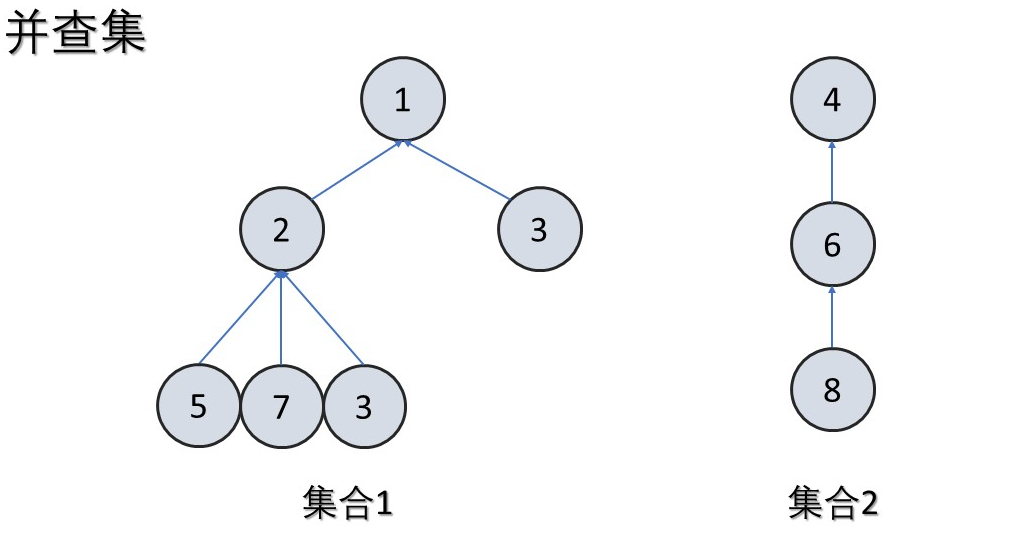
  如上图所示，如果节点之间是相互连通的，那么他们有共同祖先，也即他们属于同一个集合
  
  
  #### 节点初始化
  当一个新的节点加入并查集时，他的父节点为None
  ```python
    def add(self, x):
        if x not in self.father:
            self.father[x] = None
            self.count += 1  # 添加一个元素，该元素父节点为None,则集合分类个数自加
  ```
  
  #### 合并两个节点
  ```python
    def union(self, x, y):
        if self.is_connected(x, y):return
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            self.father(rootX) = rootY
            self.count -= 1 # 每进行一次合并，几个种类减1
  ```
  
  #### 判断两个节点是否连通
  ```python
    def is_connected(self, x, y):
        return self.find(x) == self.find(y)        
  ```
  
  #### 查找祖先
  查找某一节点的父节点，如果其父节点不为None，则一直查找到父节点为None的节点，该节点就是祖先节点
  ```python
    def find(self,x):
        root = x
        while self.father[root] is not None:
            root = self.father[root]
        return root
  ```
  
  <font color='red'> 路径优化 </font>，如果树很深，每次查询某个节点的值，都会一步步向上查找，效率低下；  
  我们可以将所有连通的节点的父节点直接置为祖先节点(等价于逐一向上连通)，可以提升查找效率,优化方法分为迭代法和递归法两种
  1. 迭代写法
  ```python
    def find(self, x):
        root = x
        while self.father[root] is not None:
            root = self.father[root]
            
        # 将连通着的所有节点的父节点变更为共同的祖先节点
        while x != root:
            direct_father = self.father[x]  # 首先保存直接父节点的值，下一轮进行变更
            self.father[x] = root  # 首个节点的值，指向祖先节点
            x = direct_father  # 连通的下一节点
            
        return root
  ```   
  2. 递归写法
  ```python
    def find(self, x):
        if self.father[x] is None:
            return self.father[x]
        self.father[x] = self.find(self.father[x]) # 递归查找到直至直接父节点为None的节点，然后逐层返回，最终结果就是祖先节点
        return self.father[x]
  ```

### 并查集整合模板如下，背诵！！！

In [1]:
class UnionFind:
    def __init__(self):
        self.father = { }
        self.count = 0
        
    def is_connected(self, x, y):
        return self.find(x) == self.find(y)
    
    def add(self, x):
        if x not in self.father:
            self.father[x] = None
            self.count += 1
            
    def find(self,x):
        root = x
        while self.father[root] is not None:
            root = self.father[root]
        
        # 路径压缩迭代写法
        while root != x:
            direct_father = self.father[x]
            self.father[x] = root
            x = direct_father
            
        return root
    
    def find_recursion(self, x): # 路径压缩递归写法
        if self.father[x] is None:
            return self.father[x]
        self.father[x] = self.find(self.father[x])
        return self.father
    
    def union(self, x, y):
        if self.is_connected(x, y):return
        
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            self.father[rootX] = rootY
            self.count -= 1

## 前缀树
   参考力扣实现前缀树题解，需要理清楚树结构和字典结构之间的关系。
   [从二叉树到前缀树详解](https://leetcode-cn.com/problems/implement-trie-prefix-tree/solution/fu-xue-ming-zhu-cong-er-cha-shu-shuo-qi-628gs/])  
   ### 前缀树模板代码如下（二维数组形式未给出）

In [4]:
class Node:
    def __init__(self):
        self.children = { }
        self.is_word = False
        
class Trie:
    def __init__(self):
        self.root = Node() # 根节点不包含任何内容
        
    def insert(self, word):
        node = self.root # 从头结点开始进行查询
        for i in word:
            if i not in node.children:
                node.children[i] = Node()
            node = node.children[i]
        node.is_word = True
        
    def search(self, word):
        node = self.root
        for i in word:
            if i not in node.children:
                return False
            
            node = node.children[i]
        return node.is_word
    
    def search_prefix(self, prefix):
        node = self.root
        for i in prefix:
            if i not in node.children:
                return False
            node = node.children[i]
        return True

### 简单写法

In [12]:
## 元组的可变性探究，变量内存管理
a = (1,2,[5,6,1])
a[2][0] = 100
print(a)

(1, 2, [100, 6, 1])


In [5]:
class Trie:
    def __init__(self):
        self.tree = { }
        
    def insert(self, word):
        cur = self.tree
        for i in word:
            if i not in cur:
                cur[i] = { }
            cur = cur[i]
        cur['flag'] = True
        
    def search(self, word):
        cur = self.tree
        for i in word:
            if i not in cur:
                return False
            cur = cur[i]
        return 'flag' in cur
    
    def startswith(self, prefix):
        cur = self.tree
        for i in prefix:
            if i not in cur:
                return False
            cur = cur[i]
            
        return True

 ## 位运算
   将程序中所涉及到的变量等内容以二进制形式进行运算，特定情况下可以简化问题，提高算法性能
   1. Python中位运算符号及其含义
   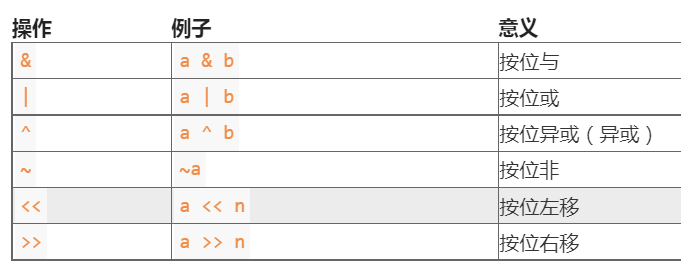
   * 其中异或运算的含义为，当位上值相同则为0，不同则为1，n ^ 0 = n, 任何数和0执行
   异或运算的结果是这个数本身
   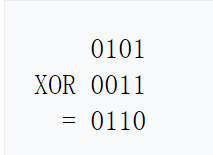
   异或运算规则：
   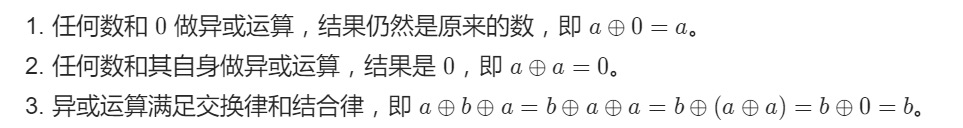  
   
   
   
   
   * 逻辑移位(上图未给出)运算表示，在最左/右侧防止一个遮挡物，二进制数字串整体向左/右移动n位后，再右/左两侧填充0至与原二进制位数相同所得到的的新二进制数 
   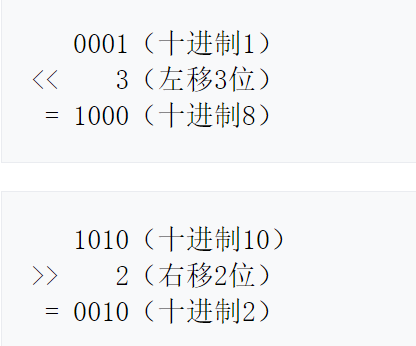
   
   * <font color='red'> 按位移位： </font>二进制数字整体向左/右移位n位，再在右/左侧添加n位0
   a << n = a * 2^n， a >> n = a * 2^(-n)
   
   2. 位运算扩充赋值
   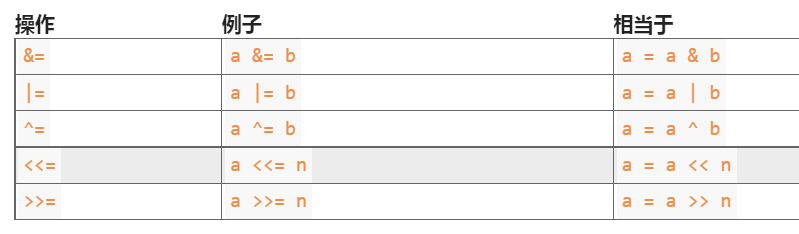
   
   3. 刷题中的常用技巧
   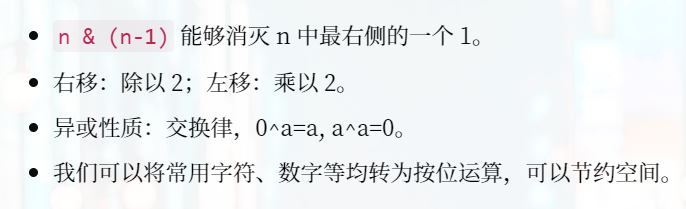